###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2017 L.A. Barba, N.C. Clementi

# Seeing stats in a new light

Welcome to the second lesson in "Take off with stats," Module 2 of our course in _Engineering Computations_. In the previous lesson, [Cheers! Stats with Beers](http://go.gwu.edu/engcomp2lesson1), we did some exploratory data analysis with a data set of canned craft beers in the US. We'll continue using that same data set here, but with a new focus on _visualizing statistics_.

In her lecture ["Looking at Data"](https://youtu.be/QYDuAo9r1xE), Prof. Kristin Sainani says that you should always plot your data. Immediatly, several things can come to light: are there outliers in your data? (Outliers are data points that look abnormally far from other values in the sample.) Are there data points that don't make sense? (Errors in data entry can be spotted this way.) And especially, you want to get a _visual_ representation of how data are distributed in your sample.

In [1]:
import numpy
import pandas
from matplotlib import pyplot
%matplotlib inline

#Import rcParams to set font styles
from matplotlib import rcParams

#Set font style and size 
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
beers = pandas.read_csv("../../data/beers.csv")

In [3]:
beers[0:10]

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
5,5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
6,6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0
7,7,0.065,NaN,2259,Foreman,American Porter,177,12.0
8,8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0
9,9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0


## Categorical vs. quantitative data

In [4]:
style_series = beers['style']

In [5]:
style_series[0:10]

0               American Pale Lager
1           American Pale Ale (APA)
2                      American IPA
3    American Double / Imperial IPA
4                      American IPA
5                     Oatmeal Stout
6           American Pale Ale (APA)
7                   American Porter
8           American Pale Ale (APA)
9    American Double / Imperial IPA
Name: style, dtype: object

In [6]:
type(style_series)

pandas.core.series.Series

In [7]:
style_counts = style_series.value_counts()
style_counts[0:5]

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
Name: style, dtype: int64

In [16]:
len(style_counts)

99

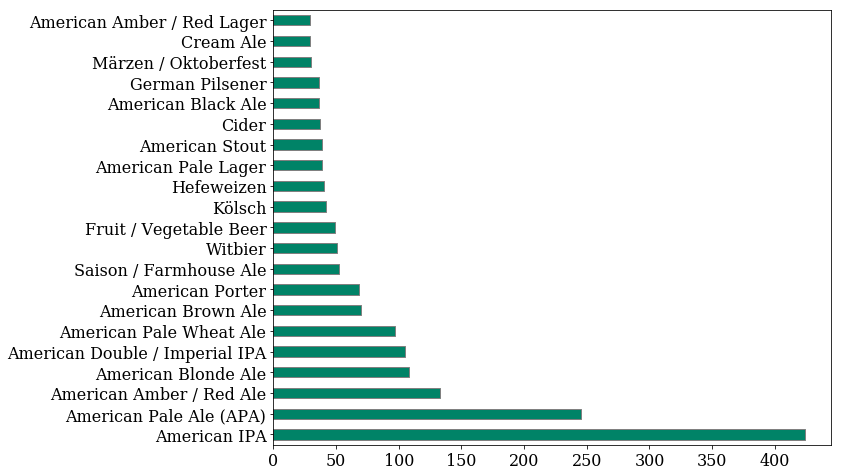

In [18]:
style_counts[0:21].plot.barh(figsize=(10,8), color='#008367', edgecolor='gray');

## Visualizing quantitative data

In [9]:
#Repeat cleaning values abv
abv_serie = beers['abv']
abv_clean = abv_serie.dropna()
abv = abv_clean.values

In [10]:
#Repeat cleaning values ibu
ibu_serie = beers['ibu']
ibu_clean = ibu_serie.dropna()
ibu = ibu_clean.values

We learned how to compute some of the quantites that give us information about our data. As you might expect, there are versions of them in NumPy and we will learn some others too.

We knew about the mean, and that we can compute with `numpy.mean()`. But what about the variance or standard deviation?

There is a [`numpy.var()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.var.html) that we can use, but we need to read the documentation to be certain that is exactly what we need. 


##### Exercise:

Go to the documentation of [`numpy.var()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.var.html) and analyze if this is the variance that correspond to the sample variance. 

*Hint*: Check what it says about the degrees of freedom.

If you did the reading you might have notice that, by default, the argument `ddof` in `numpy.var()` is set to zero. If we use the default option, then we are not really calculating the sample variance. From the previous lesson we can recall that the **sample variance** is determined by:

$$
\begin{equation*}     
     var_{sample} = \frac{1}{N-1}\sum_{i} (x_i - \bar{x})^2
\end{equation*}
$$

Therefore, we need to be explicit about the division by $N-1$ when calling `numpy.var()`. How do we do that? We explicitly set `ddof` to `1`.  

For example, to compute the sample variance for our `abv` variable we do:

In [11]:
var_abv = numpy.var(abv, ddof=1)
print(var_abv)

0.000183378552053


Now we can compute the standard deviation by taking the square root of `var_abv`:

In [12]:
std_abv = numpy.sqrt(var_abv)
print(std_abv)

0.0135417337167


You might be wondering if there is a built in function for the standard deviation in NumPy, aren't you? I encourage you to go to google and try to find something.

**Spoiler alert!!!**
You will. 

##### Exercise:

1. Read the documentation about the NumPy standard deviation function, compute the standard deviation for `abv` using this function and, check that you obtained the same value than if you take the square root of the variance computed with NumPy.

2. Compute the varaince and standard deviation for the variable `ibu`.

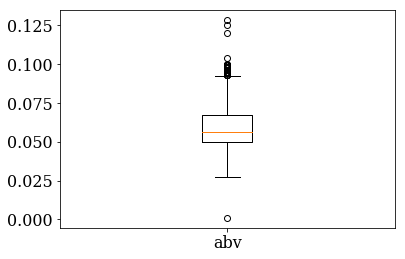

In [13]:
pyplot.boxplot(abv, labels=['abv']);

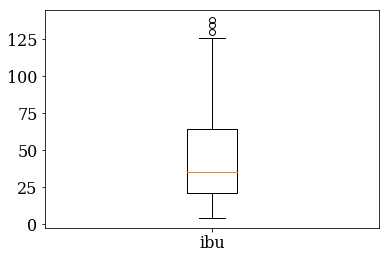

In [14]:
pyplot.boxplot(ibu, labels=['ibu']);

## References

1. [Craft beer datatset](https://github.com/nickhould/craft-beers-dataset) by Jean-Nicholas Hould.

### Recommended viewing

From ["Statistics in Medicine,"](https://lagunita.stanford.edu/courses/Medicine/MedStats-SP/SelfPaced/about), a free course in Stanford Online by Prof. Kristin Sainani, we highly recommend that you watch this lecture:
* [Looking at data](https://youtu.be/QYDuAo9r1xE)

In [15]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../../style/custom.css'
HTML(open(css_file, "r").read())